This notebook contains code that reads in the books_and_movies.csv file generated from the data_collection_and_integration.ipynb into a dataframe. The genres are then cleaned and narrowed down to the top 20 and then visualized using a pie chart. 

In [30]:
import pandas as pd

# read in csv file of books and movies and keep only the first 10000 rows 
filename = 'books_and_movies.csv'
data = pd.read_csv(filename)
data.drop(data.index[10000:], inplace = True)



In [41]:
# drop the synopis column as it is not necessary for this step
genres_df = data.drop(columns=['Synopsis'])
genres_df

,Name,Genres
0,"To Kill a Mockingbird (To Kill a Mockingbird, #1)","['Classics', 'Fiction', 'Historical', 'Academic']"
1,1984,"['Classics', 'Fiction', 'Science', 'Science']"
2,The Great Gatsby,"['Classics', 'Fiction', 'Academic', 'Literatur..."
3,Harry Potter and the Sorcerer's Stone (Harry P...,"['Fantasy', 'Young', 'Fiction']"
4,Animal Farm,"['Classics', 'Fiction', 'Science', 'Fantasy', ..."
...,...,...
9995,To Grandmother's House We Go,"['Adventure', ""Children's/Family"", 'Christmas ..."
9996,Khalnayak,"['Action/Adventure', 'Musical', 'World cinema'..."
9997,Gaja Gamini,"['Drama', 'Fantasy']"
9998,Lucky You,"['Sports', 'Romantic drama', 'Romance Film', '..."


In [37]:
# the genres are contained in a string that contains a list of strings so in order to be able to sort based on genre
# we need to clean the genres column so that it is in the right format to do operations on 
genres_uc = genres_df 
def clean_genres1(genres):
    genres1=[]
    genres2 = genres[1:-1].split(', ') 
    for i in genres2:
        i = i[1:-1]
        genres1.append(i)
    return genres1

genres_uc['Genres'] = genres_uc['Genres'].apply(clean_genres1)

genres_uc

,Name,Genres
0,"To Kill a Mockingbird (To Kill a Mockingbird, #1)","[Classics, Fiction, Historical, Academic]"
1,1984,"[Classics, Fiction, Science, Science]"
2,The Great Gatsby,"[Classics, Fiction, Academic, Literature, Hist..."
3,Harry Potter and the Sorcerer's Stone (Harry P...,"[Fantasy, Young, Fiction]"
4,Animal Farm,"[Classics, Fiction, Science, Fantasy, Literature]"
...,...,...
9995,To Grandmother's House We Go,"[Adventure, Children's/Family, Christmas movie..."
9996,Khalnayak,"[Action/Adventure, Musical, World cinema, Boll..."
9997,Gaja Gamini,"[Drama, Fantasy]"
9998,Lucky You,"[Sports, Romantic drama, Romance Film, Drama, ..."


In [38]:
# we then group the dataframe by genre to see how many different genres there are 
genres_uc = genres_uc.Genres.apply(pd.Series).stack().reset_index(level=0).rename(columns={0:'Genre'})
genres_uc = genres_uc.groupby('Genre').count().reset_index().rename(columns={'level_0':'Counts'})
genres_uc

,Genre,Counts
0,,26
1,Absurdism,47
2,Academic,55
3,Acid western,4
4,Action,1401
...,...,...
438,Writing,43
439,Wuxia,13
440,Young,217
441,Z movie,1


In [39]:
# since there are over 400 different genres, we choose the most popular genres and create a list of these 
genres_list = ['Romantic', 'Childrens', 'Romance', 'Comedy','Biography', 'Autobiography', 'Drama', 'Historical', 'Academic', 'Classics', 'Action', 'Adventure', 'Musical', 'Fantasy', 'Sports', 'Supernatural' 'Thriller', 'Science', 'Parody', 'Crime', 'Horror', 'Mystery', 'Political', 'War']

In [42]:
# the genres are contained in a string that contains a list of strings so in order to be able to sort based on genre
# we need to clean the genres column so that it is in the right format in order to check if they exist in the defined genres_list
def clean_genres(genres):
    genres1=[]
    genres2 = genres[1:-1].split(', ') 
    for i in genres2:
        i = i[1:-1]
        if i in genres_list:
            genres1.append(i)
    return genres1

genres_df['Genres'] = genres_df['Genres'].apply(clean_genres)

genres_df


,Name,Genres
0,"To Kill a Mockingbird (To Kill a Mockingbird, #1)","[Classics, Historical, Academic]"
1,1984,"[Classics, Science, Science]"
2,The Great Gatsby,"[Classics, Academic, Historical, Romance, Acad..."
3,Harry Potter and the Sorcerer's Stone (Harry P...,[Fantasy]
4,Animal Farm,"[Classics, Science, Fantasy]"
...,...,...
9995,To Grandmother's House We Go,"[Adventure, Comedy]"
9996,Khalnayak,[Musical]
9997,Gaja Gamini,"[Drama, Fantasy]"
9998,Lucky You,"[Sports, Drama, Comedy]"


In [43]:
# we then group the dataframe by these chosen genres to count how many books and movies are in each genre 
genres = genres_df.Genres.apply(pd.Series).stack().reset_index(level=0).rename(columns={0:'Genre'})
genres = genres.groupby('Genre').count().reset_index().rename(columns={'level_0':'Counts'})
genres

,Genre,Counts
0,Academic,55
1,Action,1401
2,Adventure,1062
3,Autobiography,100
4,Biography,334
5,Childrens,293
6,Classics,1129
7,Comedy,2696
8,Crime,9
9,Drama,3938


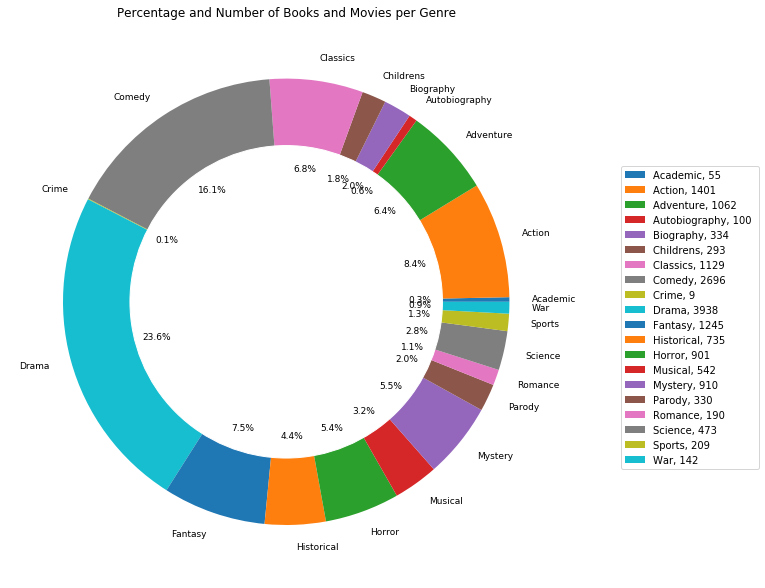

In [46]:
# we then plot all the different genres by percentage and value to visualize them 

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 20))
genres_labels = list(genres.Genre)
genres_counts = list(genres.Counts)
#explode =(0.1, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0.1)
circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(genres_counts, labels=genres_labels, autopct='%1.1f%%', textprops={'fontsize': 9})
p=plt.gcf()

p.gca().add_artist(circle)
plt.legend(labels=['%s, %1.0f ' % (l, s) for l, s in zip(genres_labels, genres_counts)], loc=(1.1, 0.2))
ax.set_title('Percentage and Number of Books and Movies per Genre')
plt.show()

In [45]:
data 

,Name,Synopsis,Genres
0,"To Kill a Mockingbird (To Kill a Mockingbird, #1)",The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical', 'Academic']"
1,1984,"The year 1984 has come and gone, but George Or...","['Classics', 'Fiction', 'Science', 'Science']"
2,The Great Gatsby,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"['Classics', 'Fiction', 'Academic', 'Literatur..."
3,Harry Potter and the Sorcerer's Stone (Harry P...,Harry Potter's life is miserable. His parents ...,"['Fantasy', 'Young', 'Fiction']"
4,Animal Farm,George Orwell's timeless and timely allegorica...,"['Classics', 'Fiction', 'Science', 'Fantasy', ..."
...,...,...,...
9995,To Grandmother's House We Go,Twin girls Sarah and Julie are two naughty but...,"['Adventure', ""Children's/Family"", 'Christmas ..."
9996,Khalnayak,Ballu is a gangster who is arrested by Inspec...,"['Action/Adventure', 'Musical', 'World cinema'..."
9997,Gaja Gamini,The central figure of the film is represented ...,"['Drama', 'Fantasy']"
9998,Lucky You,"Set in 2003, Huck Cheever is a young and tale...","['Sports', 'Romantic drama', 'Romance Film', '..."


In [ ]:
# write dataframe with cleaned genres to csv file 
filename='books_and_movies_cleaned.csv'
data.to_csv(filename, index=False)